# Comparison CUTonalá and PVlib forecast using RAP

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pvlib
from pvlib.pvsystem import PVSystem
from pvlib.location import Location
from pvlib.modelchain import ModelChain
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS

In [2]:
temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

In [3]:
cec_modules = pvlib.pvsystem.retrieve_sam('CECMod')
cec_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')

cec_module = cec_modules['Canadian_Solar_Inc__CS6X_320P']
cec_inverter = cec_inverters['INGETEAM_POWER_TECHNOLOGY_S_A___Ingecon_Sun_40TL_U_M__480V_']

In [4]:
#cec_module

In [5]:
#cec_inverter

In [6]:
latitude= 20.56
longitude= -103.22
altitude=1544
tz='America/Mexico_City'

In [7]:
location = Location(latitude=latitude, longitude=longitude, altitude=altitude, tz=tz)

In [8]:
surface_tilt = 25
surface_azimuth = 180 # pvlib uses 0=North, 90=East, 180=South, 270=West convention
albedo = 0.2

In [9]:
system = PVSystem(surface_tilt=surface_tilt, surface_azimuth=surface_azimuth,
                 module_parameters=cec_module,
                 inverter_parameters=cec_inverter,
                 temperature_model_parameters=temperature_model_parameters,
                 albedo=albedo, surface_type=None, module=None, 
                 module_type='glass_polymer',
                 modules_per_string=19.5, 
                 strings_per_inverter=8, inverter=None, 
                 racking_model='open_rack', 
                 losses_parameters=None, 
                 name='Name of PV system: Huerto de Cutonalá')

In [10]:
mc = ModelChain(system, location, name='Huerto de Cutonalá', 
                clearsky_model='ineichen', transposition_model='haydavies', 
                solar_position_method='nrel_numpy', airmass_model='kastenyoung1989',
                dc_model=None, #from module specifications
                ac_model='sandia', #from inverter specifications
                aoi_model='no_loss', 
                spectral_model='no_loss', #spectral model 'no loss' otherwise error
                temperature_model='sapm', losses_model='no_loss')

In [11]:
import datetime
#Variables de tiempo

start = pd.Timestamp(datetime.date.today(), tz='America/Mexico_City') # today's date
end = start + pd.Timedelta(days=7) # 7 days from today

#start_variable stand for a configurable variable for one given date
#end_variable stand for a configurable variable for one given end date
#days_before_today variable stands for an especific date before today

days_before_today = 7

start_variable = start - pd.Timedelta(days=days_before_today)
end_variable = start_variable + pd.Timedelta(days=1)

In [12]:
start_variable

Timestamp('2021-01-17 00:00:00-0600', tz='America/Mexico_City')

In [13]:
end_variable

Timestamp('2021-01-18 00:00:00-0600', tz='America/Mexico_City')

## Variables for files

In [14]:
# study_day variable stands for what is the date of comparision between real data and forecasted
# study_variable must follow this format: DD
study_day = '17'
month = 'Enero'
model_of_study = 'RAP'

cutonala_real_data_file = '2021-' + study_day + '-Enero.csv'
comparision_data_to_csv_date = study_day + '-' + month + '-2021-' + model_of_study
metrics_data = study_day + '-Enero-2021-' + model_of_study + '-Metrics'

In [15]:
from pvlib import solarposition, irradiance, atmosphere, pvsystem, inverter, temperature, iam
from pvlib.forecast import RAP

/Users/luisvargas/Desktop/Tesis Pvlib/env_pvlib_tesis/lib/python3.8/site-packages/pvlib/forecast.py:18: UserWarning: The forecast module algorithms and features are highly experimental. The API may change, the functionality may be consolidated into an io module, or the module may be separated into its own package.
  warnings.warn(


In [16]:
fm = RAP()

In [17]:
# Se obtiene la data y se procesa del modelo de pronostico
forecast_data = fm.get_processed_data(latitude, longitude, start_variable, end_variable)

In [18]:
#pd.set_option('display.max_columns', None)
forecast_data

,temp_air,wind_speed,ghi,dni,dhi,total_clouds,low_clouds,mid_clouds,high_clouds
2021-01-17 06:00:00-06:00,13.561859,1.538556,0.000000,0.000000,0.000000,100.0,0.0,100.0,100.0
2021-01-17 07:00:00-06:00,13.355621,0.894957,0.000000,0.000000,0.000000,100.0,0.0,100.0,100.0
2021-01-17 08:00:00-06:00,12.041229,0.848430,11.307231,0.000000,11.307231,100.0,0.0,100.0,100.0
2021-01-17 09:00:00-06:00,11.503143,0.616373,85.202170,0.000000,85.202170,100.0,0.0,100.0,99.0
2021-01-17 10:00:00-06:00,10.930267,0.707041,159.871014,1.030821,159.368355,100.0,0.0,100.0,100.0
2021-01-17 11:00:00-06:00,10.683319,0.953874,219.110567,9.946801,212.849849,100.0,0.0,100.0,100.0
2021-01-17 12:00:00-06:00,10.248810,0.950588,257.237925,13.605354,247.443025,100.0,0.0,100.0,100.0
2021-01-17 13:00:00-06:00,9.530975,1.109596,271.204388,14.679725,260.150722,100.0,0.0,100.0,100.0
2021-01-17 14:00:00-06:00,9.679840,1.418440,259.945126,13.823218,249.904753,100.0,0.0,100.0,100.0
2021-01-17 15:00:00-06:00,14.895233,0.697319,345.123730,77.029216,295.686385,71.0,0.0,36.0,71.0


In [19]:
ghi = forecast_data['ghi']
dni = forecast_data['dni']
dhi = forecast_data['dhi']
temp_air = forecast_data['temp_air']
wind_speed = forecast_data['wind_speed']
indexDF = forecast_data.index

In [20]:
weather = pd.DataFrame([dni, ghi, dhi, temp_air, wind_speed]).T

In [21]:
mc.run_model(weather)

ModelChain: 
  name: Huerto de Cutonalá
  orientation_strategy: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: cec
  ac_model: snlinverter
  aoi_model: no_aoi_loss
  spectral_model: no_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

In [22]:
mc.dc

,i_sc,v_oc,i_mp,v_mp,p_mp,i_x,i_xx
2021-01-17 06:00:00-06:00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
2021-01-17 07:00:00-06:00,-1.292470e-26,0.000000,-1.292470e-26,0.000000,-0.000000,-1.292470e-26,-1.292470e-26
2021-01-17 08:00:00-06:00,8.026177e-01,768.821451,7.556586e-01,666.585773,503.711295,7.972357e-01,6.188344e-01
2021-01-17 09:00:00-06:00,6.052307e+00,830.404927,5.713013e+00,720.674088,4117.220474,6.008542e+00,4.656413e+00
2021-01-17 10:00:00-06:00,1.138454e+01,846.079241,1.074409e+01,731.281713,7856.959384,1.130073e+01,8.658807e+00
2021-01-17 11:00:00-06:00,1.579461e+01,852.186655,1.489731e+01,733.543374,10927.826560,1.567758e+01,1.188381e+01
2021-01-17 12:00:00-06:00,1.860271e+01,855.321847,1.754474e+01,734.097503,12879.551432,1.846441e+01,1.391431e+01
2021-01-17 13:00:00-06:00,1.962200e+01,858.177602,1.850847e+01,736.105232,13624.181573,1.947561e+01,1.465252e+01
2021-01-17 14:00:00-06:00,1.879511e+01,857.759695,1.772924e+01,736.463666,13056.939134,1.865494e+01,1.406031e+01
2021-01-17 15:00:00-06:00,2.638918e+01,842.653941,2.482150e+01,714.275001,17729.375509,2.619644e+01,1.927717e+01


In [23]:
forecast_dc = mc.dc.reset_index()
forecast_dc

,index,i_sc,v_oc,i_mp,v_mp,p_mp,i_x,i_xx
0,2021-01-17 06:00:00-06:00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
1,2021-01-17 07:00:00-06:00,-1.292470e-26,0.000000,-1.292470e-26,0.000000,-0.000000,-1.292470e-26,-1.292470e-26
2,2021-01-17 08:00:00-06:00,8.026177e-01,768.821451,7.556586e-01,666.585773,503.711295,7.972357e-01,6.188344e-01
3,2021-01-17 09:00:00-06:00,6.052307e+00,830.404927,5.713013e+00,720.674088,4117.220474,6.008542e+00,4.656413e+00
4,2021-01-17 10:00:00-06:00,1.138454e+01,846.079241,1.074409e+01,731.281713,7856.959384,1.130073e+01,8.658807e+00
5,2021-01-17 11:00:00-06:00,1.579461e+01,852.186655,1.489731e+01,733.543374,10927.826560,1.567758e+01,1.188381e+01
6,2021-01-17 12:00:00-06:00,1.860271e+01,855.321847,1.754474e+01,734.097503,12879.551432,1.846441e+01,1.391431e+01
7,2021-01-17 13:00:00-06:00,1.962200e+01,858.177602,1.850847e+01,736.105232,13624.181573,1.947561e+01,1.465252e+01
8,2021-01-17 14:00:00-06:00,1.879511e+01,857.759695,1.772924e+01,736.463666,13056.939134,1.865494e+01,1.406031e+01
9,2021-01-17 15:00:00-06:00,2.638918e+01,842.653941,2.482150e+01,714.275001,17729.375509,2.619644e+01,1.927717e+01


In [24]:
droped_forecas_data = forecast_dc.drop([0,1,13,14,15,16,17,18])
time = droped_forecas_data['index'].reset_index()
time = time['index']
time

0    2021-01-17 08:00:00-06:00
1    2021-01-17 09:00:00-06:00
2    2021-01-17 10:00:00-06:00
3    2021-01-17 11:00:00-06:00
4    2021-01-17 12:00:00-06:00
5    2021-01-17 13:00:00-06:00
6    2021-01-17 14:00:00-06:00
7    2021-01-17 15:00:00-06:00
8    2021-01-17 16:00:00-06:00
9    2021-01-17 17:00:00-06:00
10   2021-01-17 18:00:00-06:00
Name: index, dtype: datetime64[ns, America/Mexico_City]

In [25]:
power_forecasted = droped_forecas_data['p_mp']
power_forecasted = power_forecasted.reset_index()
power_forecasted = power_forecasted['p_mp']
power_forecasted

0       503.711295
1      4117.220474
2      7856.959384
3     10927.826560
4     12879.551432
5     13624.181573
6     13056.939134
7     17729.375509
8     29019.024105
9     18395.982132
10     2987.798941
Name: p_mp, dtype: float64

## Retrieving real data

In [26]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
real_data_cut = pd.read_csv('./Real Data Cutonalá/' + cutonala_real_data_file)

In [27]:
real_data_cut

,SerialNumber,BoardId,DateTime,GId,Vac1,Vac2,Vac3,Iac1,Iac2,Iac3,Freq,Pac(W),Qac,CosPhi,Vdc1,Vdc2,Idc1,Idc2,Pdc1,Pdc2,PacGrid,Energy(kWh)
0,3.600160e+11,03M172129A80,17/01/2021 07:15,group1/device3,170.14,169.03,165.41,0.75,0.80,0.77,30.00,51.46,366.46,0.08,479.04,478.90,0.04,0.09,8.13,42.09,0,0.01
1,3.600160e+11,03M172129A80,17/01/2021 07:30,group1/device3,288.17,281.43,284.97,2.01,2.18,2.11,60.00,311.23,149.33,-0.44,676.74,619.41,0.23,0.27,154.00,151.67,0,0.08
2,3.600160e+11,03M172129A80,17/01/2021 07:45,group1/device3,287.61,280.82,284.73,2.75,2.84,2.99,60.00,1451.00,0.00,-0.49,711.35,677.14,0.93,1.17,659.22,795.78,0,0.44
3,3.600160e+11,03M172129A80,17/01/2021 08:00,group1/device3,287.75,280.67,284.82,3.99,4.04,4.17,60.02,2885.11,0.00,-0.11,780.25,715.85,1.58,2.33,1229.77,1673.45,0,1.16
4,3.600160e+11,03M172129A80,17/01/2021 08:15,group1/device3,287.05,279.78,284.33,4.72,4.76,4.94,60.01,3616.34,-0.55,-0.09,784.17,707.09,2.07,2.86,1621.56,2021.11,0,2.06
5,3.600160e+11,03M172129A80,17/01/2021 08:30,group1/device3,286.57,279.40,284.09,5.21,5.29,5.43,60.02,4073.55,-0.33,-0.16,757.68,699.19,2.59,3.06,1962.11,2142.23,0,3.07
6,3.600160e+11,03M172129A80,17/01/2021 08:45,group1/device3,286.65,279.24,283.82,6.66,6.71,6.90,60.02,5377.66,-1.00,-0.36,736.75,693.28,3.66,3.92,2701.44,2720.11,0,4.43
7,3.600160e+11,03M172129A80,17/01/2021 09:00,group1/device3,286.77,279.01,283.87,14.51,14.60,14.83,60.00,12226.00,-0.78,0.11,745.00,691.01,8.43,8.80,6275.33,6065.56,0,7.44
8,3.600160e+11,03M172129A80,17/01/2021 09:15,group1/device3,286.24,278.13,282.96,9.24,9.25,9.53,59.99,7661.33,0.33,-0.13,728.13,674.93,5.26,5.76,3843.33,3886.33,0,9.35
9,3.600160e+11,03M172129A80,17/01/2021 09:30,group1/device3,286.59,278.34,283.20,19.41,19.45,19.81,60.02,16454.16,-3.09,0.14,730.54,678.14,11.42,12.28,8327.74,8296.07,0,13.31


In [39]:
droped_data_cut = real_data_cut.drop([0,1,2,4,5,6,8,9,10,12,13,14,16,17,18,20,21,22,24,25,26,28,29,30,32,33,34,36,37,38,40,41,42,44,45,46,47])

In [40]:
droped_data_cut

,SerialNumber,BoardId,DateTime,GId,Vac1,Vac2,Vac3,Iac1,Iac2,Iac3,Freq,Pac(W),Qac,CosPhi,Vdc1,Vdc2,Idc1,Idc2,Pdc1,Pdc2,PacGrid,Energy(kWh)
3,3.600160e+11,03M172129A80,17/01/2021 08:00,group1/device3,287.75,280.67,284.82,3.99,4.04,4.17,60.02,2885.11,0.00,-0.11,780.25,715.85,1.58,2.33,1229.77,1673.45,0,1.16
7,3.600160e+11,03M172129A80,17/01/2021 09:00,group1/device3,286.77,279.01,283.87,14.51,14.60,14.83,60.00,12226.00,-0.78,0.11,745.00,691.01,8.43,8.80,6275.33,6065.56,0,7.44
11,3.600160e+11,03M172129A80,17/01/2021 10:00,group1/device3,285.29,276.85,281.85,12.05,11.98,12.40,59.99,10057.67,-0.55,-0.02,706.65,670.12,7.17,7.60,5062.45,5092.00,0,21.39
15,3.600160e+11,03M172129A80,17/01/2021 11:00,group1/device3,286.15,277.66,282.61,34.40,34.43,34.96,59.99,29200.33,-4.89,-0.04,676.11,630.82,22.13,23.36,14970.11,14746.55,0,46.68
19,3.600160e+11,03M172129A80,17/01/2021 12:00,group1/device3,287.32,278.92,283.93,38.46,38.52,39.06,60.00,32800.78,-2.11,-0.07,659.46,613.98,25.61,26.96,16902.11,16563.89,0,78.61
23,3.600160e+11,03M172129A80,17/01/2021 13:00,group1/device3,286.57,277.83,282.70,40.21,40.25,40.82,59.99,34168.33,0.89,0.07,659.42,613.41,26.66,28.17,17589.11,17292.33,0,111.92
27,3.600160e+11,03M172129A80,17/01/2021 14:00,group1/device3,287.89,278.68,283.76,38.78,38.78,39.33,60.01,33048.88,-0.11,0.09,659.70,615.78,25.75,27.16,16999.66,16733.56,0,145.89
31,3.600160e+11,03M172129A80,17/01/2021 15:00,group1/device3,287.00,278.13,283.32,32.59,32.55,33.10,59.99,27696.11,6.56,0.16,668.61,628.99,21.14,22.33,14135.21,14046.11,0,175.38
35,3.600160e+11,03M172129A80,17/01/2021 16:00,group1/device3,287.19,278.31,283.21,24.52,24.43,24.96,60.04,20801.34,1.11,0.09,690.49,647.46,15.24,16.27,10524.77,10542.11,0,199.44
39,3.600160e+11,03M172129A80,17/01/2021 17:00,group1/device3,287.00,277.82,282.86,13.80,13.64,14.14,59.99,11574.11,-1.56,-0.24,626.01,669.20,8.76,9.25,5492.45,6188.67,0,215.01


In [41]:
power_real = droped_data_cut['Pac(W)']
power_real = power_real.reset_index()
power_real = power_real['Pac(W)']
power_real

0      2885.11
1     12226.00
2     10057.67
3     29200.33
4     32800.78
5     34168.33
6     33048.88
7     27696.11
8     20801.34
9     11574.11
10      637.45
Name: Pac(W), dtype: float64

In [42]:
data_dict = {'time': time,'real_data': power_real, 'forecasted_data': power_forecasted}
dframe = pd.DataFrame(data_dict)
dframe

,time,real_data,forecasted_data
0,2021-01-17 08:00:00-06:00,2885.11,503.711295
1,2021-01-17 09:00:00-06:00,12226.00,4117.220474
2,2021-01-17 10:00:00-06:00,10057.67,7856.959384
3,2021-01-17 11:00:00-06:00,29200.33,10927.826560
4,2021-01-17 12:00:00-06:00,32800.78,12879.551432
5,2021-01-17 13:00:00-06:00,34168.33,13624.181573
6,2021-01-17 14:00:00-06:00,33048.88,13056.939134
7,2021-01-17 15:00:00-06:00,27696.11,17729.375509
8,2021-01-17 16:00:00-06:00,20801.34,29019.024105
9,2021-01-17 17:00:00-06:00,11574.11,18395.982132


In [43]:
comparision = dframe.set_index('time')
comparision

,real_data,forecasted_data
time,,
2021-01-17 08:00:00-06:00,2885.11,503.711295
2021-01-17 09:00:00-06:00,12226.00,4117.220474
2021-01-17 10:00:00-06:00,10057.67,7856.959384
2021-01-17 11:00:00-06:00,29200.33,10927.826560
2021-01-17 12:00:00-06:00,32800.78,12879.551432
2021-01-17 13:00:00-06:00,34168.33,13624.181573
2021-01-17 14:00:00-06:00,33048.88,13056.939134
2021-01-17 15:00:00-06:00,27696.11,17729.375509
2021-01-17 16:00:00-06:00,20801.34,29019.024105


In [44]:
comparision_to_csv = comparision.to_csv('./comparision data/' + comparision_data_to_csv_date, index=False)

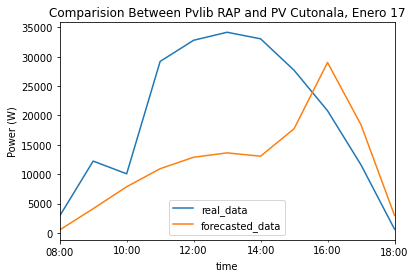

In [45]:
comparision.plot()
plt.ylabel('Power (W)')
plt.title('Comparision Between Pvlib %s and PV Cutonala, %s %s' %(model_of_study, month, study_day));

### RMSE

$  RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}} $

In [46]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
import numpy as np

In [47]:
real = comparision['real_data']
real

time
2021-01-17 08:00:00-06:00     2885.11
2021-01-17 09:00:00-06:00    12226.00
2021-01-17 10:00:00-06:00    10057.67
2021-01-17 11:00:00-06:00    29200.33
2021-01-17 12:00:00-06:00    32800.78
2021-01-17 13:00:00-06:00    34168.33
2021-01-17 14:00:00-06:00    33048.88
2021-01-17 15:00:00-06:00    27696.11
2021-01-17 16:00:00-06:00    20801.34
2021-01-17 17:00:00-06:00    11574.11
2021-01-17 18:00:00-06:00      637.45
Name: real_data, dtype: float64

In [48]:
forecasted = comparision['forecasted_data']
forecasted

time
2021-01-17 08:00:00-06:00      503.711295
2021-01-17 09:00:00-06:00     4117.220474
2021-01-17 10:00:00-06:00     7856.959384
2021-01-17 11:00:00-06:00    10927.826560
2021-01-17 12:00:00-06:00    12879.551432
2021-01-17 13:00:00-06:00    13624.181573
2021-01-17 14:00:00-06:00    13056.939134
2021-01-17 15:00:00-06:00    17729.375509
2021-01-17 16:00:00-06:00    29019.024105
2021-01-17 17:00:00-06:00    18395.982132
2021-01-17 18:00:00-06:00     2987.798941
Name: forecasted_data, dtype: float64

In [49]:
print("MSE:"+str(mean_squared_error(forecasted, real)))
print("RMSE:"+str(np.sqrt(mean_squared_error(forecasted, real))))
print("MSLE:"+str(mean_squared_log_error(forecasted, real)))
print("RMSLE:"+str(np.sqrt(mean_squared_log_error(forecasted, real))))
print("MAE:"+str(mean_absolute_error(forecasted, real)))

MSE:167970378.5661432
RMSE:12960.338674824174
MSLE:0.9763711968335094
RMSLE:0.9881149714651172
MAE:10797.940892433071


In [50]:
MSE = mean_squared_error(forecasted, real)
RMSE = np.sqrt(mean_squared_error(forecasted, real))
MSLE = mean_squared_log_error(forecasted, real)
RMSLE = np.sqrt(mean_squared_log_error(forecasted, real))
MAE = mean_absolute_error(forecasted, real)

In [51]:
metrics_obj = {'MSE': [MSE], 'RMSE':[RMSE], 'MSLE':[MSLE], 'RMSLE':[RMSLE], 'MAE':[MAE]}
metrics_df = pd.DataFrame(metrics_obj)
metrics_df

,MSE,RMSE,MSLE,RMSLE,MAE
0,1.679704e+08,12960.338675,0.976371,0.988115,10797.940892


In [52]:
metrics_df.to_csv('./comparision data/' + metrics_data, index=False)